In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

sns.set(style="whitegrid")

csv_path = "wandb_data/"

In [13]:
df = pd.read_csv(csv_path + "6 init_std exploration_rate.csv")

def drop_min_max_columns(df):
    return df[[col for col in df.columns if not (col.endswith('__MIN') or col.endswith('__MAX'))]]

df = drop_min_max_columns(df)

In [14]:
df.head()

,Step,noisy_layer_init_std: 10000 - exploration_rate,noisy_layer_init_std: 1000 - exploration_rate,noisy_layer_init_std: 100 - exploration_rate,noisy_layer_init_std: 10 - exploration_rate,noisy_layer_init_std: 1 - exploration_rate,noisy_layer_init_std: 0.1 - exploration_rate,noisy_layer_init_std: 0.01 - exploration_rate,noisy_layer_init_std: 0.001 - exploration_rate,noisy_layer_init_std: 0.0001 - exploration_rate
0,1,0.80,0.914286,0.909091,0.815385,0.46250,0.071429,0.0,0.0,0.0
1,2,0.80,0.871429,0.890909,0.861538,0.50000,0.014286,0.0,0.0,0.0
2,3,0.83,0.878571,0.881818,0.784615,0.46250,0.071429,0.0,0.0,0.0
3,4,0.79,0.900000,0.881818,0.800000,0.44375,0.085714,0.0,0.0,0.0
4,5,0.88,0.842857,0.854545,0.761538,0.50000,0.171429,0.0,0.0,0.0


In [15]:
x_n = 'noisy_layer_init_std'
y_n = 'exploration_rate_aggregate'
df_no_step = df.drop(columns='Step')
mean_values = df_no_step.mean().reset_index()
mean_values.columns = ['flag', 'exploration_rate_aggregate']
mean_values[x_n] = mean_values['flag'].str.extract(fr'{x_n}: (10*|0.0*1)')
_df = mean_values[[x_n, 'exploration_rate_aggregate']]
_df = _df.iloc[::-1]
_df[x_n] = _df[x_n].astype(float).apply(lambda v: f'$10^{{{int(np.log10(v))}}}$')

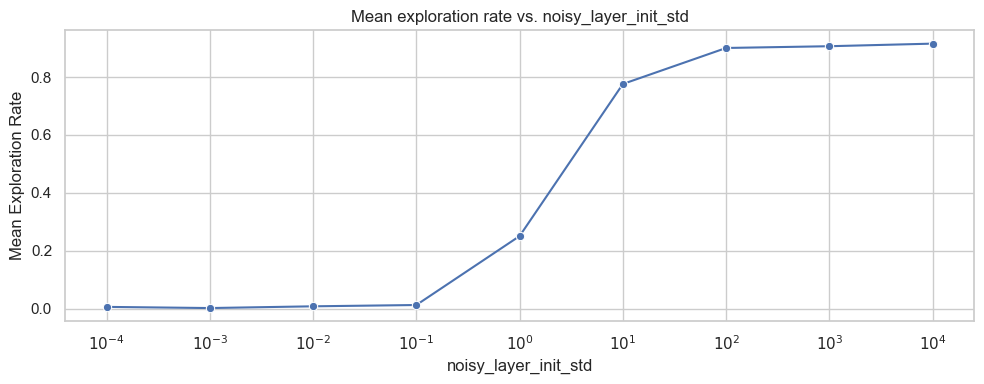

In [23]:
plt.figure(figsize=(10, 4))
sns.lineplot(
    data=_df,
    x=x_n,
    y=y_n,
    marker='o',
)
plt.xlabel(x_n)
plt.ylabel('Mean Exploration Rate')
plt.title(f'Mean exploration rate vs. {x_n}')
plt.tight_layout()
# plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
# plt.gca().invert_xaxis()

plt.savefig(f"results/{y_n}_vs_{x_n}.png", dpi=300, bbox_inches='tight')

plt.show()

In [6]:
x_n = 'hidden_layer_size'
y_n = 'exploration_rate_aggregate'
df_no_step2 = df.drop(columns='Step')
mean_values2 = df_no_step2.mean().reset_index()
mean_values2.columns = ['flag', 'exploration_rate_aggregate']
print(mean_values2)
mean_values[x_n] = mean_values['flag'].str.extract(fr'{x_n}: (\d*)')
_df = mean_values[[x_n, 'exploration_rate_aggregate']]
_df = _df.iloc[::-1]
_df[x_n] = _df[x_n].astype(float).apply(lambda v: f'{v}')

                                              flag  exploration_rate_aggregate
0   noisy_layer_init_std: 10000 - exploration_rate                    0.915275
1    noisy_layer_init_std: 1000 - exploration_rate                    0.906346
2     noisy_layer_init_std: 100 - exploration_rate                    0.900295
3      noisy_layer_init_std: 10 - exploration_rate                    0.775877
4       noisy_layer_init_std: 1 - exploration_rate                    0.250678
5     noisy_layer_init_std: 0.1 - exploration_rate                    0.012557
6    noisy_layer_init_std: 0.01 - exploration_rate                    0.008065
7   noisy_layer_init_std: 0.001 - exploration_rate                    0.002083
8  noisy_layer_init_std: 0.0001 - exploration_rate                    0.006085


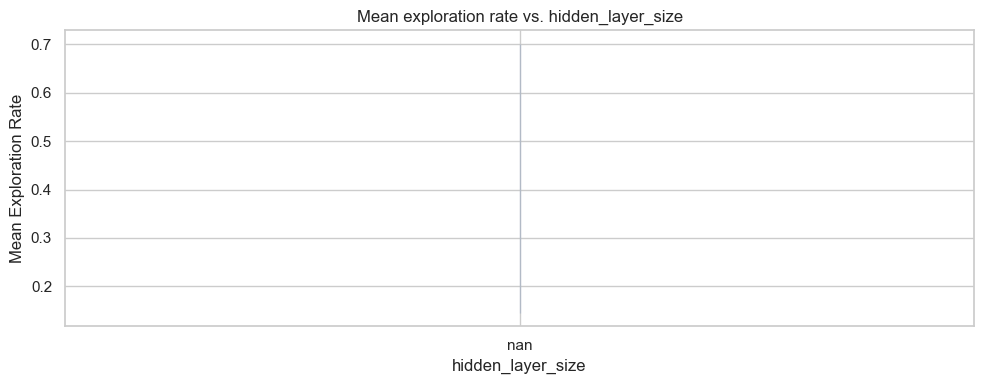

In [7]:
plt.figure(figsize=(10, 4))
sns.lineplot(
    data=_df,
    x=x_n,
    y=y_n,
)
plt.xlabel(x_n)
plt.ylabel('Mean Exploration Rate')
plt.title(f'Mean exploration rate vs. {x_n}')
plt.tight_layout()
# plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
# plt.gca().invert_xaxis()

plt.savefig(f"results/{y_n}_vs_{x_n}.png", dpi=300, bbox_inches='tight')

plt.show()